In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
dataset = pd.read_csv('data/pcos_data.csv')

In [9]:
dataset.columns

Index(['Age', 'Weight_kg', 'Height_ft', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'PCOS_Meds', 'Stressed', 'Exercize', 'Vege',
       'Cardiovascular_Disease', 'Childhood_Trauma', 'Diabetes',
       'Insulin_Resistance', 'Conception_Difficulty', 'Mental_Health',
       'Hirsutism', 'Hyperandrogenism', 'Hormonal_Imbalance',
       'Menstrual_Irregularity', 'Family_History_PCOS', 'Marital_Status',
       'PCOS'],
      dtype='object')

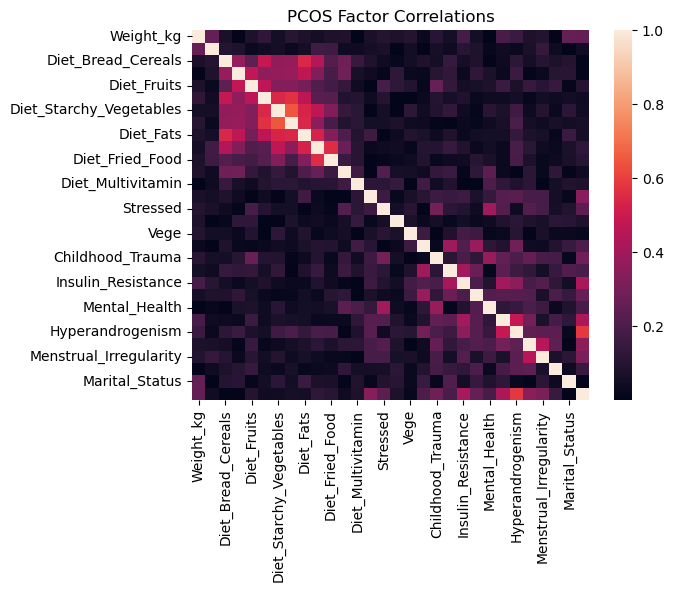

In [10]:
import seaborn as sns


sns.heatmap(abs(dataset.corr(numeric_only=True)), annot=False)
plt.title("PCOS Factor Correlations")
plt.show()

In [10]:
dataset = dataset.dropna()

In [11]:
X = dataset.iloc[:, 0:30].values
y = dataset.iloc[:, 30].values

In [12]:
X = X[: , 1:]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
classifier1 = Sequential()

In [16]:
X_train = X_train.reshape(-1, 29)

In [17]:
classifier1 = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(29,)), 
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\RMeehan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
classifier1.fit(tf.expand_dims(X_train, axis=-1), y_train, batch_size = 75, epochs= 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7283 - loss: 0.6049
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.5488
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.5197
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8158 - loss: 0.4725
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.4548
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.4316   
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.4146 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8864 - loss: 0.3828
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8819 - loss: 0.3613 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8871 - loss: 0.3651 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.3412
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8920 - loss: 0.

In [20]:
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = y_test.astype(int)
y_pred = y_pred.flatten()
y_test = y_test.flatten()
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[24  3]
 [ 4  4]]
0.8


In [21]:
patient = [[56.7, 155.448, 5, 7, 3, 3, 2, 2, 5, 7, 1, 7, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]]
patient = sc.transform(patient)
new_prediction = classifier1.predict(patient)
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.9982865]]


In [24]:
weight = (input("Enter your weight (kg): "))
height = (input("Enter your height (cm): "))
diet_bread =  int(input("How many days a week do you eat bread-products? (numeral, 0-7): "))
diet_milk = int(input("How many days a week do you drink milk? (numeral, 0-7): "))
diet_fruit = int(input("How many days a week do you eat fruit? (numeral, 0-7): "))
diet_vege = int(input("How many days a week do you eat vegetables? (numeral, 0-7): "))
diet_starch =int(input("How many days a week do you eat starchy vegetables? (numeral, 0-7): "))
diet_non_starch = int(input("How many days a week do you eat non-starchy vegetables? (numeral, 0-7): "))
diet_fat = int(input("How many days a week do you eat fatty foods? (numeral, 0-7): "))
diet_sweets = int(input("How many days a week do you eat sweets? (numeral, 0-7): "))
diet_fried = int(input("How many days a week do you eat fried food? (numeral, 0-7): "))
diet_tea_coffee =int(input("How many days a week do you coffee or tea? (numeral, 0-7): "))
diet_vitamin =int(input("How many days a week do you eat a multivitamin? (numeral, 0-7): "))
pcos_meds = int(input("Are you on mediciation for PCOS/other hormone issues? (for all future questions, input 0 for no and 1 for yes)"))
stressed = int(input("Are you stressed?: "))
exercise = int(input("Do you exercise?: "))
vegeterian = int(input("Are you a vegeterian?: "))
cardiovascular_disease = int(input("Do you have a cardiovascular disease?: "))
childhood_trauma =int(input("Do you have childhood trauma?: "))
diabetes = int(input("Do you have diabetes?: "))
insulin_resistance = int(input("Is your body resistant to insulin?: "))
conception_difficulty = int(input("Do you have conception difficulties? (Awkard!): "))
mental_health = int(input("Do you have mental health issues?: ")) 
hirstutism = int(input("Do you have hirstutism? (Male-pattern hair growth): "))
hyperandrogenism =int(input("Do you have hyperandrogenism?: "))
hormonal_imbalance =  int(input("Do you have hormonal imbalances?: "))
menstrual_irregularity = int(input("Do you have menstrual irregularity?: "))
family_pcos = int(input("Do you have a family history of PCOS?: "))
marital_status = int(input("Are you married?: "))

In [25]:
patient = [[weight, height, diet_bread, diet_milk, diet_fruit, diet_vege, diet_starch, diet_non_starch, diet_fat, diet_sweets, diet_fried, diet_tea_coffee, diet_vitamin, pcos_meds, stressed, exercise, vegeterian, cardiovascular_disease, childhood_trauma, diabetes, insulin_resistance, conception_difficulty, mental_health, hirstutism, hyperandrogenism, hormonal_imbalance, menstrual_irregularity, family_pcos, marital_status]]
patient = sc.transform(patient)
new_prediction = classifier1.predict(patient)
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.0033339]]
